In [24]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV,train_test_split


In [3]:
data = pd.read_csv('./titanic/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [9]:
df = data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [11]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [14]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Sex         889 non-null object
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [20]:
labels = df['Embarked'].unique().tolist()
df['Embarked'] = df['Embarked'].apply(lambda x:labels.index(x))
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Sex         889 non-null object
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
Embarked    889 non-null int64
dtypes: float64(2), int64(5), object(1)
memory usage: 102.5+ KB


In [21]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [22]:
labels = df['Sex'].unique().tolist()
df['Sex'] = df['Sex'].apply(lambda x:labels.index(x))
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Sex         889 non-null int64
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
Embarked    889 non-null int64
dtypes: float64(2), int64(6)
memory usage: 102.5 KB


In [57]:
x = df.iloc[:,df.columns != 'Survived']
y = df.iloc[:,df.columns == 'Survived']['Survived']

In [58]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3)
print(xtrain.shape)
print(xtest.shape)

(622, 7)
(267, 7)


In [59]:
#重新整理索引，避免后期使用loc等函数出现问题
for i in (xtrain,xtest,ytrain,ytest):
    i.index = range(i.shape[0])

In [60]:
clf = DecisionTreeClassifier(random_state = 0)
clf.fit(xtrain,ytrain)
clf.score(xtest,ytest)

0.8202247191011236

In [61]:
from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier(random_state = 0)
score = cross_val_score(clf,x,y,cv=10).mean()
score

0.77842185903983663

0.817798774259


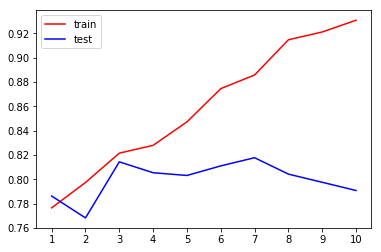

In [64]:
tr = []
te = []
for i in range(10):
    clf = DecisionTreeClassifier(random_state=25,max_depth=i+1,criterion='gini')
    clf.fit(xtrain,ytrain)
    score_train = clf.score(xtrain,ytrain)
    score_test = cross_val_score(clf,x,y,cv=10).mean()
    tr.append(score_train)
    te.append(score_test)
print(max(te))
plt.plot(range(1,11),tr,color='red',label='train')
plt.plot(range(1,11),te,color='blue',label='test')
plt.xticks(range(1,11))
plt.legend()
plt.show()

In [68]:
import numpy as np
params={'criterion':["gini","entropy"],
        'splitter':('best','random'),
        'max_depth': range(1,10),
        'min_samples_leaf':range(1,50,5),
        'min_impurity_decrease': np.linspace(0,0.5,50)
       }

clf = DecisionTreeClassifier(random_state = 0)
gs = GridSearchCV(clf,params,cv=10,n_jobs=-1)
gs.fit(xtrain,ytrain)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'criterion': ['gini', 'entropy'], 'splitter': ('best', 'random'), 'max_depth': range(1, 10), 'min_samples_leaf': range(1, 50, 5), 'min_impurity_decrease': array([ 0.     ,  0.0102 ,  0.02041,  0.03061,  0.04082,  0.05102,
        0.06122,  0.07143,  0.08163,  0.09184,  0.10204,  0.11224,...837,
        0.42857,  0.43878,  0.44898,  0.45918,  0.46939,  0.47959,
        0.4898 ,  0.5    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [66]:
gs.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 26,
 'splitter': 'random'}

In [67]:
gs.best_score_

0.82315112540192925